# Parcial práctico 1

## Punto 1


In [4]:
import brownian_motion as bm
import numpy as np

# Punto 3
Comprobar con simulación que el proceso $V_t=e^{\frac{-\alpha t}{2}}B_{\alpha e^{\alpha t}}$ es un proceso gaussiano estacionario.

Se puede ver que este proceso es idénticamente distribuido a un proceso $\sqrt{\alpha} B_1$. Lo que permite su simulación:

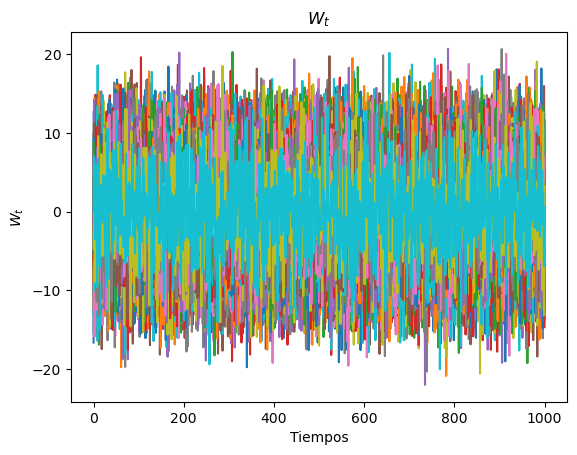

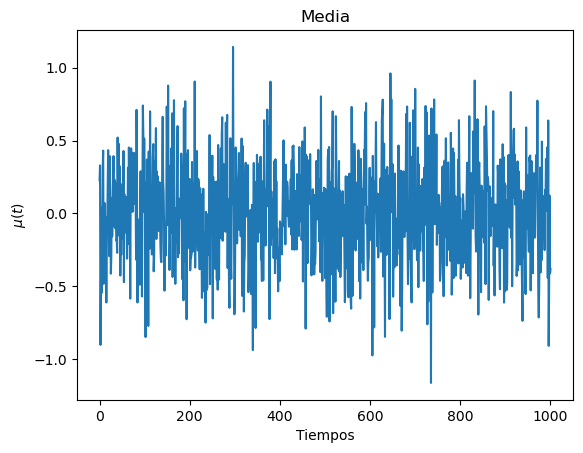

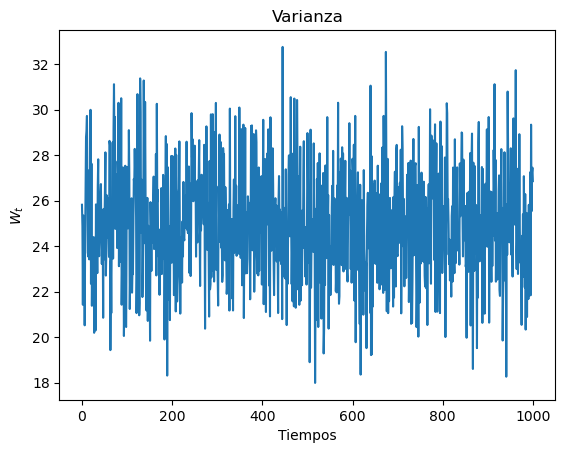

In [15]:
import numpy as np
import brownian_motion as bm

def process(n,d,alpha):
    return np.random.normal(0,alpha,size=(d,n))

def empiric_matrix_stats(B:np.array):
    """
    Recibe: 
    B: matriz (d x n) de d trayectorias de dimensión n. 
    Retorna: 
    mu_hat_t: vector de función esperanza estimada (func de t) y
    cov_hat_st: matriz que estima función de covarianza (func de s y t). 
    En cada caso, mu_hat_t[i] será la estimación de E(W_{i*dt}) mientras que 
    cov_hat_st[i,j] será estimación de Cov(W_{i*dt},W_{j*dt}) para el dt elegido al momento de simular.

    """
    if B.ndim==1:
        raise Exception("Argument not a matrix")
    else: 
        d,n=B.shape
        mu_hat_t=np.mean(B,axis=0)
        cov_hat_st=np.cov(B,rowvar=False) #Puedo obtener la estimación de varianzas con np.diag(cov)
    return mu_hat_t, cov_hat_st

n=1000
proc=process(n+1,200,5)
mu_hat,cov_hat=empiric_matrix_stats(proc)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,n,n+1),proc.T)
ax.set_title("$W_t$")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 

fig, ax = plt.subplots()
ax.plot(np.linspace(0,n,n+1),mu_hat.T)
ax.set_title("Media")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$\mu(t)$")
plt.show() 

fig, ax = plt.subplots()
ax.plot(np.linspace(0,n,n+1),np.diag(cov_hat).T)
ax.set_title("Varianza")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 





    
    #process=np.exp(-alpha/2*times)*

    

## Punto 4
Martingalas: 
Apuesta con estrategia martingala apostando a una de dos opciones equiprobables.

a) 5 dólares para apostar. Parada cuando se agote el dinero o 10 apuestas

b) 5 dólares para apostar, sin límite de apuestas.

c) 10 dólares, bancarrota o 50 veces/80 veces según escenario.

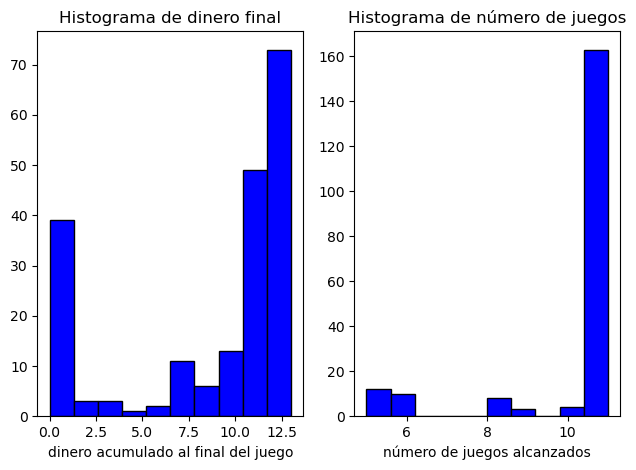

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#Asumiendo que la apuesta inicial es uno 
def bet_sim(cash:int,limit:int,bet_inic,plot_example=False):
    list_bet=[1]
    list_cash=[cash]
    bet=bet_inic
    iter=1
    while iter <=(limit) and cash>0:
        u=np.random.uniform()
        if u <=0.5: #gana
            cash+=bet*2
            bet=bet_inic
            list_bet.append(bet)
            list_cash.append(cash)
        else: 
            cash-=bet
            bet=min(2*bet,cash)
            list_cash.append(cash)
            list_bet.append(bet)
        iter+=1    
    if plot_example==True:
        plt.plot(list_cash)
    return iter, cash

#Caso a
vect_numero_juegos_a=[]
vect_ganancias_a=[]
for i in range(200):
    num_jueg,ganancia=bet_sim(5,10,0.4)
    vect_numero_juegos_a.append(num_jueg)
    vect_ganancias_a.append(ganancia)

for i in [1,2]:
    ax = plt.subplot(1, 2, i)
    vect_plot=vect_ganancias_a if i==1 else vect_numero_juegos_a
    ax.hist(vect_plot , color = 'blue', edgecolor = 'black')
    title='Histograma de dinero final' if i==1 else 'Histograma de número de juegos'
    ax.set_title(title)
    x_label='dinero acumulado al final del juego' if i==1 else 'número de juegos alcanzados'
    ax.set_xlabel(x_label, size = 10)
plt.tight_layout()
plt.show()        





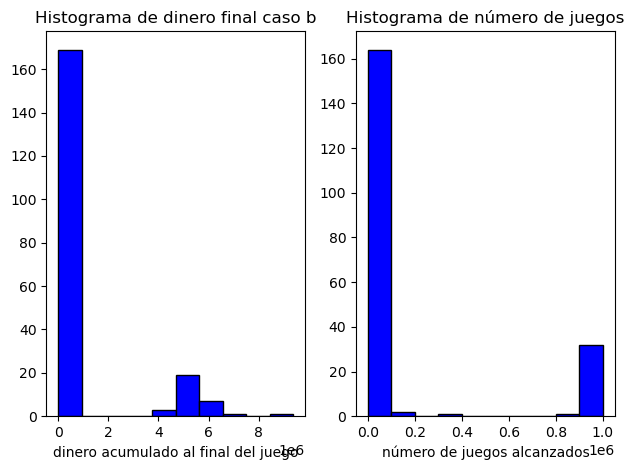

In [9]:

#caso b 
vect_numero_juegos_b=[]
vect_ganancias_b=[]
for i in range(200):
    num_jueg,ganancia=bet_sim(5,1e6,1)
    vect_numero_juegos_b.append(num_jueg)
    vect_ganancias_b.append(ganancia)

for i in [1,2]:
    ax = plt.subplot(1, 2, i)
    vect_plot=vect_ganancias_b if i==1 else vect_numero_juegos_b
    ax.hist(vect_plot , color = 'blue', edgecolor = 'black')
    title='Histograma de dinero final caso b' if i==1 else 'Histograma de número de juegos'
    ax.set_title(title)
    x_label='dinero acumulado al final del juego' if i==1 else 'número de juegos alcanzados'
    ax.set_xlabel(x_label, size = 10)
plt.tight_layout()
plt.show()  



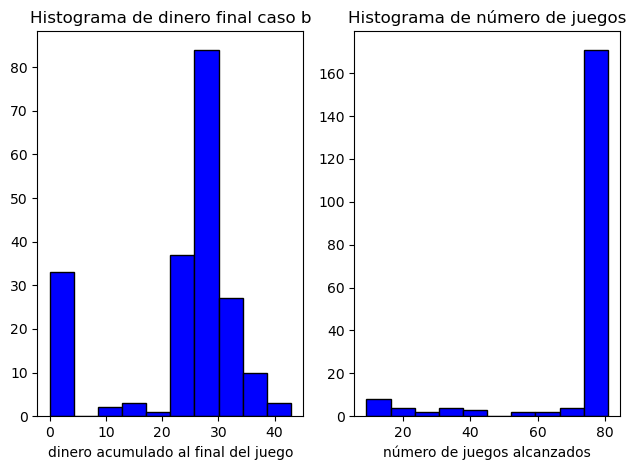

In [10]:
#Caso c
vect_numero_juegos_c=[]
vect_ganancias_c=[]
for i in range(200):
    num_jueg,ganancia=bet_sim(10,80,0.1)
    vect_numero_juegos_c.append(num_jueg)
    vect_ganancias_c.append(ganancia)
    

for i in [1,2]:
    ax = plt.subplot(1, 2, i)
    vect_plot=vect_ganancias_c if i==1 else vect_numero_juegos_c
    ax.hist(vect_plot , color = 'blue', edgecolor = 'black')
    title='Histograma de dinero final caso b' if i==1 else 'Histograma de número de juegos'
    ax.set_title(title)
    x_label='dinero acumulado al final del juego' if i==1 else 'número de juegos alcanzados'
    ax.set_xlabel(x_label, size = 10)
plt.tight_layout()
plt.show()  

(71, 0.0)

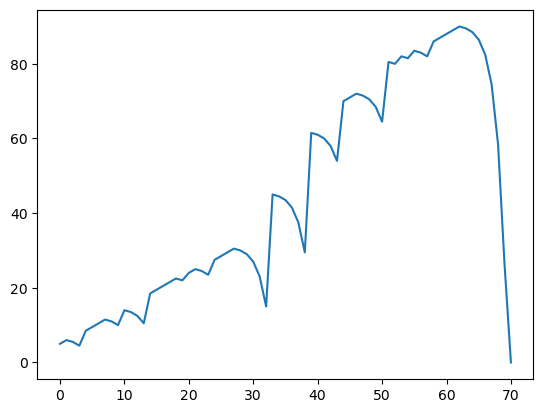

In [28]:
bet_sim(5,80, 0.5,plot_example=True)